# Make Plots
Generate the comparisions between SchNet and QML, study whether the models indeed perform worse on larger molecules than smaller

In [1]:
%matplotlib inline
from jcesr_ml.style import model_style
from matplotlib import pyplot as plt
from ase.units import Hartree, eV
import pandas as pd
import json
import os

Key lookup values

In [2]:
schnet_dir = os.path.join('..', 'benchmark', 'schnet')
qml_baseline = os.path.join('..', 'benchmark', 'qml')
big_mol_size = 67

## Read in the Results
Get the results from QML, SchNet calculations and the baseline data

In [3]:
schnet_results = pd.read_json('schnet-results.json')

In [4]:
schnet_results.query('n_electrons == 61').sort_values('mae_big')

,converged,mae,mae_big,n_electrons,name,run_time,size
4,True,0.017967,0.020881,61,g4mp2-delta,594.168096,14317
20,True,0.024209,0.027013,61,g4mp2-stacked-delta,1144.946093,14317
12,True,0.030185,0.032532,61,g4mp2-transfer,594.818161,14317
24,True,0.068089,0.070993,61,g4mp2-charges-in-outnet,603.224634,14317
8,True,0.070512,0.074349,61,g4mp2-charges,591.878841,14317
0,True,0.068313,0.075127,61,g4mp2,594.661861,14317
16,True,0.141039,0.153373,61,g4mp2-multitask,596.937621,14317


In [5]:
schnet_random = pd.read_json(os.path.join(schnet_dir, 'g4mp2-models.json'))

In [6]:
with open(os.path.join('qml', 'fchl.json')) as fp:
    qml_results = pd.DataFrame.from_records(json.load(fp)['g4mp2_benchmark'])

In [7]:
qml_results

,big_mae,electron_cut,mae,test_time,train_size,train_time
0,0.021625,41.0,0.024528,315.703409,152.0,0.662593
1,0.004446,51.0,0.004381,3900.415890,1161.0,80.977722
2,0.000990,61.0,0.000902,85958.878878,14317.0,35054.672712


In [8]:
with open(os.path.join('qml', 'fchl-delta.json')) as fp:
    qml_delta_results = pd.DataFrame.from_records(json.load(fp)['g4mp2_with_b3lyp_results'])

In [9]:
with open('baseline-stats.json') as fp:
    baseline = json.load(fp)

In [10]:
with open(os.path.join(qml_baseline, 'fchl.json')) as fp:
    qml_random = pd.DataFrame.from_records(json.load(fp)['g4mp2_benchmark'])

In [11]:
with open(os.path.join(qml_baseline, 'fchl-delta.json')) as fp:
    qml_random_delta = pd.DataFrame.from_records(json.load(fp)['g4mp2_with_b3lyp_results'])

Load in the errors for each molecule size

In [12]:
per_e_results = pd.read_csv('per_e_results.csv').merge(
    pd.read_csv(os.path.join('qml', 'per_e_results.csv')),
    on='n_electrons')

## Evaluate the Performance of SchNet Model
Evaluate a single model in greater detail

In [13]:
models_to_show = ['B3LYP', 'FCHL', 'FCHL Delta', 'g4mp2', 'g4mp2-delta', 'g4mp2-transfer']

Plot only the MAE/$e$

/home/wardlt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


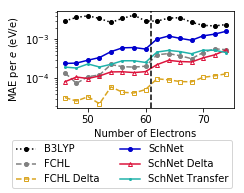

In [14]:
fig, ax = plt.subplots()

# Add performance of SchNet and B3LYP
for m in models_to_show:
    ax.semilogy(per_e_results['n_electrons'], per_e_results['mae_' + m] / per_e_results['n_electrons'], markersize=4, **model_style[m])
ax.set_ylabel(u'MAE per $e$ (eV/e)')

# Make a legend
fig.legend(*ax.get_legend_handles_labels(), loc='lower center', ncol=2)

# Add divider between moleculesa
ax.set_xlabel('Number of Electrons')
ax.set_ylim([0, max(ax.get_ylim())])
ax.plot([61,]*2, ax.get_ylim(), 'k--')

fig.set_size_inches(3.5, 2.7)
fig.tight_layout(rect=[0,0.21,1,1])
fig.savefig(os.path.join('figures', 'g4mp2_61e_bar_plots_MAEpere.png'), dpi=320)
fig.savefig(os.path.join('figures', 'g4mp2_61e_bar_plots_MAEpere.pdf'))

Plot both the MAE and MAE/$e$

/home/wardlt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


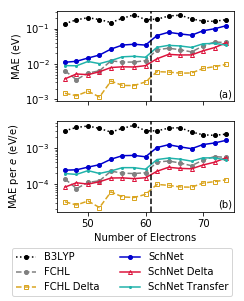

In [15]:
fig, axs = plt.subplots(2, 1, sharex=True)

# Add performance of SchNet and B3LYP
ax = axs[0]
ax.text(0.99, 0.02, '(a)', ha='right', va='bottom', transform=ax.transAxes)
for m in models_to_show:
    ax.semilogy(per_e_results['n_electrons'], per_e_results['mae_' + m], markersize=4, **model_style[m])
ax.set_ylabel(u'MAE (eV)')

# Add performance of SchNet and B3LYP
ax = axs[1]
ax.text(0.99, 0.02, '(b)', ha='right', va='bottom', transform=ax.transAxes)
for m in models_to_show:
    ax.semilogy(per_e_results['n_electrons'], per_e_results['mae_' + m] / per_e_results['n_electrons'], markersize=4, **model_style[m])
ax.set_ylabel(u'MAE per $e$ (eV/e)')

# Make a legend
fig.legend(*ax.get_legend_handles_labels(), loc='lower center', ncol=2)

# Add divider between molecules in train and test set
ax.set_xlabel('Number of Electrons')
for ax in axs:
    ax.set_ylim([0, max(ax.get_ylim())])
    ax.plot([61,]*2, ax.get_ylim(), 'k--')

fig.set_size_inches(3.5, 4.2)
fig.tight_layout(rect=[0,0.15,1,1])
fig.savefig(os.path.join('figures', 'g4mp2_61e_bar_plots.png'), dpi=320)

Plot the MAE and RMSE/$\sigma$

/home/wardlt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


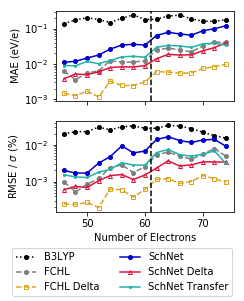

In [16]:
fig, axs = plt.subplots(2, 1, sharex=True)

# Add performance of SchNet and B3LYP
ax = axs[0]
for m in models_to_show:
    ax.semilogy(per_e_results['n_electrons'], per_e_results['mae_' + m], markersize=4, **model_style[m])
ax.set_ylabel(u'MAE (eV/e)')

# Add performance of SchNet and B3LYP
ax = axs[1]
for m in models_to_show:
    ax.semilogy(per_e_results['n_electrons'], per_e_results['rmse/sigma_' + m] * 100, markersize=4, **model_style[m])
ax.set_ylabel(u'RMSE / $\sigma$ (%)')

# Make a legend
fig.legend(*ax.get_legend_handles_labels(), loc='lower center', ncol=2)

# Add divider between molecules in train and test set
ax.set_xlabel('Number of Electrons')
for ax in axs:
    ax.set_ylim([0, max(ax.get_ylim())])
    ax.plot([61,]*2, ax.get_ylim(), 'k--')

fig.set_size_inches(3.5, 4.2)
fig.tight_layout(rect=[0,0.15,1,1])
fig.savefig(os.path.join('figures', 'g4mp2_61e_bar_plots_rmse_mae.png'), dpi=320)

## Make the Comparison between SchNet and QML
Constrast their ability to predict the properties of molecules larger than those in the training set. 

In [17]:
print('{:.1f}x improvement over B3LYP for SchNet delta'.format(baseline['u0_atomization_mae_big'] /
                                                               schnet_results.query('n_electrons == 61 and name == "g4mp2-delta"')['mae_big'].min()))

8.5x improvement over B3LYP for SchNet delta


In [18]:
print('{:.1f}x improvement over B3LYP for FCHL delta'.format(baseline['u0_atomization_mae_big'] /
                                                             (qml_delta_results.query('electron_cut == 61')['big_mae'].min() * Hartree / eV)))

27.7x improvement over B3LYP for FCHL delta


In [19]:
schnet_results.query('n_electrons == 61').sort_values('mae_big')

,converged,mae,mae_big,n_electrons,name,run_time,size
4,True,0.017967,0.020881,61,g4mp2-delta,594.168096,14317
20,True,0.024209,0.027013,61,g4mp2-stacked-delta,1144.946093,14317
12,True,0.030185,0.032532,61,g4mp2-transfer,594.818161,14317
24,True,0.068089,0.070993,61,g4mp2-charges-in-outnet,603.224634,14317
8,True,0.070512,0.074349,61,g4mp2-charges,591.878841,14317
0,True,0.068313,0.075127,61,g4mp2,594.661861,14317
16,True,0.141039,0.153373,61,g4mp2-multitask,596.937621,14317


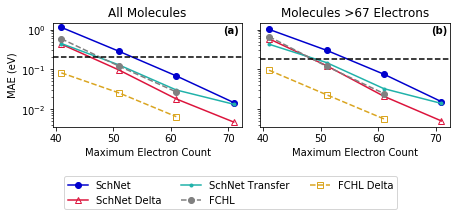

In [20]:
fig, axs = plt.subplots(1, 2, sharey=True)

for i, (ax, t) in enumerate(zip(axs, ['', '_big'])):
    handles = []
    labels = []

    # Add in the SchNet data
    for gid, group in schnet_results.groupby('name'):
        if gid not in models_to_show: continue
        group = group.sort_values('n_electrons')

        hdl = ax.semilogy(group['n_electrons'], group['mae' + t],
                          **model_style[gid])
        handles.append(hdl[0])
        labels.append(model_style[gid]['label'])
        
        ax.set_xlabel('Maximum Electron Count')
        
    # Add in QML
    hdl = ax.semilogy(qml_results['electron_cut'], 
                      qml_results['mae' if t == '_big' else 'big_mae'] * Hartree / eV,
                      **model_style['FCHL'])
    handles.append(hdl[0])
    labels.append('FCHL')
    
    hdl = ax.semilogy(qml_delta_results['electron_cut'], 
                      qml_delta_results['mae' if t == '_big' else 'big_mae'] * Hartree / eV,
                      **model_style['FCHL Delta'])
    handles.append(hdl[0])
    labels.append('FCHL Delta')
    
    # Mark the baseline accuracies
    ax.set_xlim(ax.get_xlim())
    
    #  Accuracy of b3lyp total energy
    #val = baseline['u0_total_energy_mae' + t]
    #ax.plot(ax.get_xlim(), [val]*2, 'k--')
    #ax.text(51, val * 0.8, 'B3LYP', va='top')
    
    #  Accuracy of b3lyp atomization energy
    val = baseline['u0_atomization_mae' + t]
    ax.plot(ax.get_xlim(), [val]*2, 'k--')
    #ax.text(61, val * 1.2, 'B3LYP Atomization', va='bottom')


# Make the labels
for ax, l in zip(axs, ['(a)', '(b)']):
    ax.text(0.9, 0.9, l, transform=ax.transAxes, fontweight='demibold')

        
# Add labels to the axis types
axs[0].set_title('All Molecules')
axs[1].set_title('Molecules >{} Electrons'.format(big_mol_size))
axs[0].set_ylabel('MAE (eV)')
    
# Plot the baseline accuracies

#ax.plot(ax.get_xlim(), [g4mp2_mad * Hartree / eV]*2, 'k--')
#ax.text(200, g4mp2_mad * Hartree / eV * 1.2, 'Guess-the-Mean')
#ax.plot(ax.get_xlim(), [u0_mae_to_g4mp2 * Hartree / eV]*2, 'k--')
#ax.text(100, u0_mae_to_g4mp2 * Hartree / eV * 1.2, 'B3LYP')

fig.legend(handles, labels, loc='lower center', ncol=3)

fig.set_size_inches(6.5, 3)
fig.tight_layout(rect=[0,0.2,1,1])
fig.savefig(os.path.join('figures', 'g4mp2-learning-curve.png'), dpi=320)

Plot only the large molecules

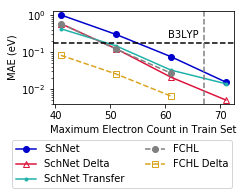

In [21]:
fig, ax = plt.subplots()


# Add in the SchNet data
for gid, group in schnet_results.groupby('name'):
    if gid not in models_to_show: continue
    group = group.sort_values('n_electrons')

    ax.semilogy(group['n_electrons'], group['mae_big'],
                      **model_style[gid])
ax.set_xlabel('Maximum Electron Count in Train Set')

# Add in QML
ax.semilogy(qml_results['electron_cut'], 
                  qml_results['big_mae'] * Hartree / eV,
                  **model_style['FCHL'])

ax.semilogy(qml_delta_results['electron_cut'], 
                  qml_delta_results['big_mae'] * Hartree / eV,
                  **model_style['FCHL Delta'])

# Mark the baseline accuracies
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())

val = baseline['u0_atomization_mae_big']
ax.plot(ax.get_xlim(), [val]*2, 'k--')
ax.text(66, val * 1.2, 'B3LYP', va='bottom', ha='right')

# Mark the big molecule split
ax.plot([big_mol_size]*2, ax.get_ylim(), '--', color='gray')

ax.set_ylabel('MAE (eV)')
    
fig.legend(*ax.get_legend_handles_labels(), loc='lower center', ncol=2)

fig.set_size_inches(3.5, 2.7)
fig.tight_layout(rect=[0,0.23,1,1])
fig.savefig(os.path.join('figures', 'g4mp2-learning-curve-big-only.png'), dpi=320)
fig.savefig(os.path.join('figures', 'g4mp2-learning-curve-big-only.pdf'))

## Compare Learning Rate to Random Splits
For a given training set size, how much worse is the performance when we sample only the smaller molecules?

In [22]:
qml_results

,big_mae,electron_cut,mae,test_time,train_size,train_time
0,0.021625,41.0,0.024528,315.703409,152.0,0.662593
1,0.004446,51.0,0.004381,3900.415890,1161.0,80.977722
2,0.000990,61.0,0.000902,85958.878878,14317.0,35054.672712


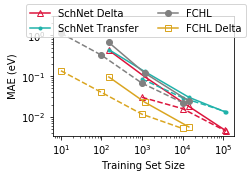

In [23]:
fig, ax = plt.subplots()

# Plot only delta and g4mp2
temp = schnet_results.query('name == "g4mp2-delta"').sort_values('size')
ax.loglog(temp['size'], temp['mae'], 'o-', **model_style['g4mp2-delta'])

temp = schnet_random.query('name == "g4mp2-delta"').sort_values('size')
hdl = ax.loglog(temp['size'], temp['mae'], 'o--', **model_style['g4mp2-delta'])
hdl[0].set_linestyle('--')

# Make the g4mp2-transfer
temp = schnet_results.query('name == "g4mp2-transfer"').sort_values('size')
ax.loglog(temp['size'], temp['mae'], 's-', **model_style['g4mp2-transfer'])

temp = schnet_random.query('name == "g4mp2-transfer"').sort_values('size')
hdl = ax.loglog(temp['size'], temp['mae'], 's--', **model_style['g4mp2-transfer'])
hdl[0].set_linestyle('--')

# Plot FCHL
hdl = ax.loglog(qml_results['train_size'], qml_results['mae'] * Hartree / eV, 'o-', **model_style['FCHL'])
hdl[0].set_linestyle('-')
hdl = ax.loglog(qml_random['train_size'], qml_random['mae'] * Hartree / eV, 'o--', **model_style['FCHL'])
hdl[0].set_linestyle('--')

# Plot FCHL Delta
hdl = ax.loglog(qml_delta_results['train_size'], qml_delta_results['mae'] * Hartree / eV, 'o--', **model_style['FCHL Delta'])
hdl[0].set_linestyle('-')
hdl = ax.loglog(qml_random_delta['train_size'], qml_random_delta['mae'] * Hartree / eV, 'o--', **model_style['FCHL Delta'])
hdl[0].set_linestyle('--')

# Add the labels
ax.set_xlabel('Training Set Size')
ax.set_ylabel('MAE (eV)')

ax.set_ylim(min(ax.get_ylim()), 3)

# Add the legend
fig.legend(*list(zip(*list(zip(*ax.get_legend_handles_labels()))[::2])), ncol=2)

fig.set_size_inches(3.5, 2.5)
fig.tight_layout()
fig.savefig(os.path.join('figures', 'compare-partition-to-random.png'), dpi=320)

*Finding*: The models do have higher errors when trained on small molecules than with random subsets of the same size. The differences are more pronounced in the FHCL models than QML